# Lab 1
Data Analysis about Breast Cancer 


In [1]:
 student_name =   "Rony Ventura"
 student_id =     "rove3809"
 student_email =  "rove3809@student.su.se"

# 3 Conduct an initial appraisal of the data without coding anything. While analyzing the dataset files, create multiple **text cells** in the jupyter notebook where you reflect and comment on the following statements: *(Again, the answer to these statements should be text formatted in markdown and not code, you will do the code later)*:

#### a) What is the domain area of the dataset? Under which circumstances was it collected? For which kind of task or purpose was the dataset collected?
This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. There is no information regarding how  or for what purpose was it collected. By overviewing the data I think that it can be usefull for stadistics and some information regarding the chances of surviving after the removal of the tumour depending on the stage and histology type.

#### b) How many files does the dataset have? Which data format? Do the files have headers or another file describing the data? Are the data values separated by commas, semicolon, or tabs? Do you need to load and analyze all the files or just some of them contain valuable data?

The dataset is in one .csv file with its respective headers. The data values are separated by commas therefore the default separator is used.This file contains all the needed data for this assignment 

#### c) How many features and how many observations does the dataset have?
The dataset contains 16 features with 334 observations

#### d) Does it contain numerical features? How many? What are the feature names? If it does not contain numerical features, please find a different dataset where you can conduct numerical analysis.

The dataset contains 5 numeric features : Age,Protein1,Protein2,Protein3,Protein4.

#### e) Does it contain categorical features? How many? What are the feature names?
The dataset contains 3 categorical features :Surgery_type,Histology,Tumour_Stage

#### f) Does it contain binary features? How many? What are the feature names? If it does not contain, which relevant binary feature could you add to the dataset?
The dataset contains 5 binary features : Gender,ER status,PR status,HER2 status,Patient_Status

# 4 Basic EDA

#### 4.1 Load the dataset into a pandas DataFrame properly formatted with headers and data types.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("BRCA.csv")
"""df.dropna(inplace=True) # deleting null values
dummy=pd.get_dummies(df["Gender"]) # creating dummies to change the data type to boolean 1 and 0 values
dummy2=pd.get_dummies(df["ER status"])
dummy3=pd.get_dummies(df["PR status"])
dummy4=pd.get_dummies(df["HER2 status"])
dummy5=pd.get_dummies(df["Patient_Status"])
df2=pd.concat((df,dummy), axis=1)
df2=df2.drop(["Gender"],axis =1)
df2=df2.drop(["MALE"],axis=1)
df2=df2.rename(columns={"FEMALE":"Gender"})
# Gender female is 1 and male is 0
df2=pd.concat((df,dummy2), axis=1)
df2=df2.drop(["ER status"],axis =1)
df2=df2.rename(columns={"Positive":"ER status"})
# ER status positive is 1 and negative is 0
df2=pd.concat((df,dummy3), axis=1)
df2=df2.drop(["PR status"],axis =1)
df2=df2.rename(columns={"Positive":"PR status"})
#PR status positive is 1 and negative is 0
df2=pd.concat((df,dummy4), axis=1)
df2=df2.drop(["HER2 status"],axis =1)
df2=df2.drop(["Negative"],axis=1)
df2=df2.rename(columns={"Positive":"HER2 status"})
#HER2 status positve is 1 and negative is 0
df2=pd.concat((df,dummy5), axis=1)
df2=df2.drop(["Patient_Status"],axis =1)
df2=df2.drop(["Dead"],axis=1)
df2=df2.rename(columns={"Alive":"Patient_Status"})
#Patient_Status alive is 1 and dead is 0
""" # Code commented is to cast binary data type to boolean 1 and 0 in case it is preferred to use boolean values
df2=df
df2["Patient_ID"] = df2["Patient_ID"].astype("string")
df2["Age"] = df2["Age"].astype("int")
df2["Gender"] = df2["Gender"].astype("category")#Casted as category to facilitate data operations with their real values "Male" or "Female"
df2["Histology"] = df2["Histology"].astype("category")
df2["Tumour_Stage"] = df2["Tumour_Stage"].astype("category")
df2["ER status"] = df2["ER status"].astype("category")#Casted as category to facilitate data operations with their real values "Positive" or "Negative"
df2["PR status"] = df2["PR status"].astype("category")#Casted as category to facilitate data operations with their real values "Positive" or "Negative"
df2["HER2 status"] = df2["HER2 status"].astype("category")#Casted as category to facilitate data operations with their real values "Positive" or "Negative"
df2["Surgery_type"] = df2["Surgery_type"].astype("category")
df2["Date_of_Surgery"] = df2["Date_of_Surgery"].astype("datetime64")
df2["Date_of_Last_Visit"] = df2["Date_of_Last_Visit"].astype("datetime64")
df2["Patient_Status"] = df2["Patient_Status"].astype("category")#Casted as category to facilitate data operations with their real values "Alive" or "Dead"
df2.dtypes



Patient_ID                    string
Age                            int32
Gender                      category
Protein1                     float64
Protein2                     float64
Protein3                     float64
Protein4                     float64
Tumour_Stage                category
Histology                   category
ER status                   category
PR status                   category
HER2 status                 category
Surgery_type                category
Date_of_Surgery       datetime64[ns]
Date_of_Last_Visit    datetime64[ns]
Patient_Status              category
dtype: object

In [4]:
df2.isnull().sum() #checking null values

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

#### 4.2 Perform the basic steps of data preparation, and numerical understanding of the data (feature selection, handle missing values).


In [5]:
df2.dropna(inplace=True)
df.dropna(inplace=True) # dropping null values on the 2 data frames to be able to run the first code that was commented

In [6]:
df2.isnull().sum() #check if null values have been dropped

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [7]:
df2.groupby(by="Tumour_Stage").size() #How many patients are per tumour stage

Tumour_Stage
I       60
II     180
III     77
dtype: int64

In [8]:
df2.groupby(by="Histology").size() # How many patients per histology type

Histology
Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
dtype: int64

In [9]:
df.groupby(by="Patient_Status").size() # How many patients are alive or dead

Patient_Status
Alive    255
Dead      62
dtype: int64

In [10]:
df2.shape #Overall size of the dataframe

(317, 16)

In [11]:
df2.describe() #numeric information of certain values


,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [12]:
df[["Tumour_Stage","Patient_Status"]].describe() #relevant information of tumour stage and patient status


,Tumour_Stage,Patient_Status
count,317,317
unique,3,2
top,II,Alive
freq,180,255


#### 4.3 Formulate 3 simple questions that you can answer from your dataset (see section 'Understanding the data numerically'). Besides writing the code, provide a written answer to your question based on the obtained numerical results.


1. How many Male patients are?




In [13]:
#1. How many Male patients are?

df3 = df2[ (df2["Gender"]=="MALE")  ]
print("The generated subset size is :",df3.shape)
df3.groupby(by="Gender").size()


The generated subset size is : (4, 16)


Gender
FEMALE    0
MALE      4
dtype: int64

A: There are a total of 4 male patients registered on the data set 

2. How many patients with age of 55 or older have tumour stage III?



In [14]:
# How many patients with age of 55 or older have tumour stage III

df4 = df2[ (df2["Age"]>=55) & (df2["Tumour_Stage"]=="III")  ]
print("The generated subset size is :",df4.shape)
df4.groupby(by="Tumour_Stage").size()


The generated subset size is : (37, 16)


Tumour_Stage
I       0
II      0
III    37
dtype: int64

A:There are a total of 37 patients who are 55 or older and have tumour stage III

3. How many patients with age of 45 or younger have tumour stage I and have already died?



In [15]:
# How many patients with age of 45 or younger have tumour stage I and have already died

df5 = df2[ (df2["Age"]<=45) & (df2["Tumour_Stage"]=="I") & (df2["Patient_Status"]=="Dead")]
print("The generated subset size is :",df5.shape)
df5.groupby(by="Tumour_Stage").size()

The generated subset size is : (2, 16)


Tumour_Stage
I      2
II     0
III    0
dtype: int64

A:There are a total of 2 patients that are 45 or younger with stage I tumour that have already died

#### 4.4 Create at least two univariate and two multivariate plots describing your data graphically. 
Provide a written description of what you can interpret from your plots. You are encouraged to experiment new visualization techniques from the official datasets beyond the ones that were provided in the notebook as example.

Text(0, 0.5, '# of patients')

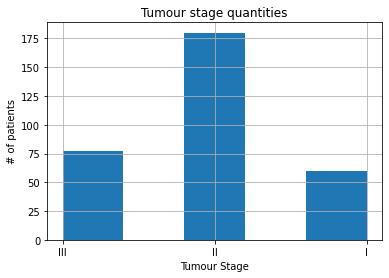

In [16]:
df2["Tumour_Stage"].hist(bins=5)
plt.title("Tumour stage quantities")
plt.xlabel('Tumour Stage')
plt.ylabel('# of patients')

Interpretation : The mayority of the patients have a tumour stage II and  60 patients are on stage I

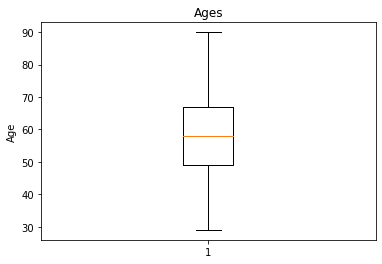

In [17]:
plt.boxplot(df2["Age"])
plt.title("Ages")
plt.ylabel('Age')
plt.show()

Interpretation : Mean patients age is 58 years old

Text(0, 0.5, 'Density')

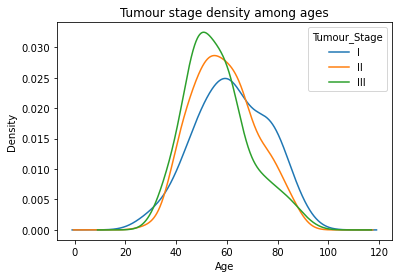

In [18]:
df_pivot = df.pivot(columns="Tumour_Stage", values="Age")
df_pivot.plot.kde(legend=True)
plt.title("Tumour stage density among ages")
plt.xlabel('Age')
plt.ylabel('Density')


Interpretation : The three types of tumour stage have similar density through ages but tumour stage III has a significant decrease after +/- 55 years old  , meaning that life expectancy is lower as if we compare it with tumour stage I  we can see how the graph keeps similar density values among a wider age range.

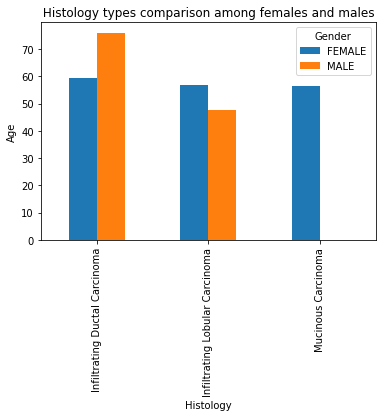

In [19]:
avg_balance_marital_personal = df.groupby(by=["Histology", "Gender"])["Age"].mean()
avg_balance_marital_personal.unstack().plot.bar(stacked=False)

plt.title(" Histology types comparison among females and males ")
plt.ylabel('Age')
plt.show()

Interpretation : Infiltrating Ductal Carcinoma is the only type where males are older compared to females on the diferent histology types